<h1> Moons </h1>

The Moons dataset is a simple toy dataset to visualize clustering and classification problems.

<h2 style="background-color:rgba(100,100,100,0.5);"> Frame the problem </h2>

Moons predictor is clearly a typical supervised learning task, since you are given labeled training examples.

It is also a typical classification task, since you are asked to classify the category that an input belongs to.

Finally, there is no continuous flow of data coming into the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.

<h2 style="background-color:rgba(100,100,100,0.5);"> Fetch and load data </h2>


In [19]:
from sklearn.datasets import make_moons
import pandas as pd

# Fetch the data
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Convert to pandas objects
X = pd.DataFrame(X)
y = pd.Series(y)

<h2 style="background-color:rgba(100,100,100,0.5);"> Analyze the data and its structure </h2>

In [20]:
# Display shape
print(X.shape)
print(y.shape)

# Display head
print(X.head())
print(y.head())

# Display info
print(X.info())

# Display percentage of missing values for each attribute
print(X.isnull().sum() / len(X) * 100)

(100, 2)
(100,)
          0         1
0  1.613838 -0.491151
1  0.089847  0.504391
2  0.747210 -0.369111
3 -1.101745  0.236856
4 -0.728715  0.146523
0    1
1    1
2    1
3    0
4    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
0    0.0
1    0.0
dtype: float64


<h3><b>How many instances are there in the dataset</b></h3>

There are 100 values in the data set, which is not very large.

<h3><b>Are there missing values (non-null) for any attributes</b></h3>

>Data cleaning will need to be done to address any missing values

All the parameters do not have missing values.

<h3><b>What are the numerical and categorical attributes</b></h3>

>Categorical attributes will need to be mapped to numerical values (encoding)

All the parameters are numerical attributes.

In [21]:
X.describe()

,0,1
count,100.000000,100.000000
mean,0.507184,0.244047
std,0.905111,0.507207
min,-1.272016,-0.649143
25%,-0.056200,-0.167451
50%,0.432910,0.252951
75%,1.157670,0.722873
max,2.409381,1.271114


<h3><b> Preview the center and dispersion of the features </b></h3>

The above values show the center and dispersion of the features.

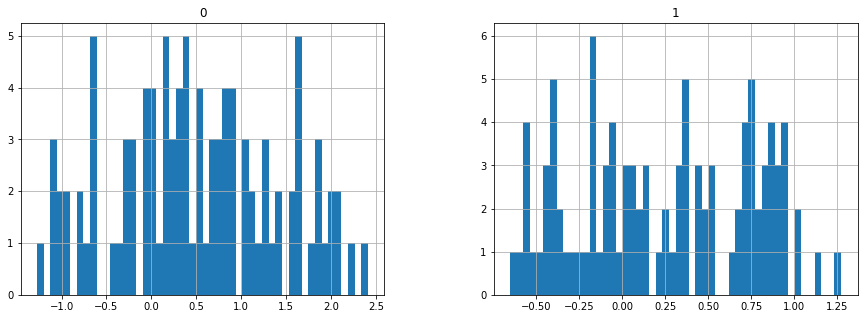

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
X.hist(bins=50, figsize=(15, 5))
plt.show()

<h3><b>Plot the distributions for the features</b></h3>

The three keys to describing the distributions are shape, center, and spread.
Consider clusters, gaps, modes, and outliers.
Look for reasons behind any unusual features.

Shape:
>A few common shapes are symmetric, skewed to the right, skewed to the left, bell-shaped, and uniform distributions. Consider transforming tail-heavy distributions to be more bell-shaped.

Spread:
>Check whether the end values in the range have been capped. For these capped values, either collect actual values to replace the capped values or remove the values from the dataset (The system should not be evaluated poorly if it predicts values beyond the capped values).

>Understand the units for each distribution, whether any scaling has been applied. Consider apply feature scaling for features with different scales (Machine Learning algorithms usually don’t perform well when the input numerical attributes have very different scales).

Since this is just an example dataset for experimenting with clustering/classification problems, and does not represent real life data, the features are not expected to be in a normal distribution.

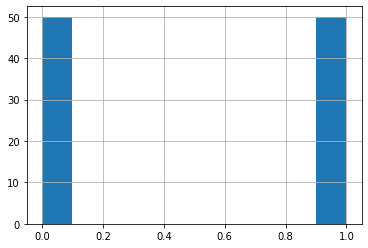

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

y.hist()
plt.show()

Although there is not much in interpreting the output distribution, both categories are equally represented.

<h2 style="background-color:rgba(100,100,100,0.5);"> Sample the data for testing and training purposes </h2>

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is train_test_split(), we'll use this with the random_state parameter. Also, since this function can accept multiple datasets with an identical number of rows, and it will split them on the same indices, we can use it to split both the data and target (we'll use stratify on the target so the test and training data will have similar distribution for the target as the original data).

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

<h2 style="background-color:rgba(100,100,100,0.5);"> Discover and visualize the data to gain insights </h2>

There is no additional value that we can get from attribute transformation, so we can skip this step for this problem.

<h2 style="background-color:rgba(100,100,100,0.5);"> Prepare the Data for Machine Learning Algorithms </h2>

Data cleaning is not required for this data set to clean up missing attributes.

Custom transformation is not needed for this data set.

Feature scaling can be useful to improve the performance of the models.

Ffirst let’s revert to a clean training set (by copying X_train once again):

In [29]:
moons = X_train.copy()

<h3><b> Data Cleaning - Missing attributes </b></h3>

Data cleaning is not required for this data set to clean up missing attributes.

<h3><b> Data Cleaning - Handling text and categorical attributes </b></h3>

Custom transformation is not needed for this data set.

<h3><b> Feature Scaling </b></h3>

One of the most important transformations you need to apply to your data is feature scaling. 

For this, we will use the scaler directly in the pipeline later to scale these values.

<h3><b> Custom Transformers </b></h3>

Custom transformers are not needed for this data set.

<h3><b> Transformation Pipelines </b></h3>

Scikit-Learn provides the Pipeline class to help with sequences of transformations.

Pipeline for numerical attributes:

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

num_pipeline = Pipeline([
    ('robust_scaler', RobustScaler())
])

moons_prepared = num_pipeline.fit_transform(moons)

<h2 style="background-color:rgba(100,100,100,0.5);"> Select and Train Models </h2>

Select a model that you think might work best first. Train and evaluate the performance of this model. The model might fit correctly, underfit or overfit the actual data.

The general approach when a particular model doesn't quite fit perfectly, is to try out many other models from various categories of Machine Learning algorithms (e.g., several Support Vector Machines with different kernels, and possibly a neural network), without spending too much time tweaking the hyperparameters for a particular model.

The goal is to shortlist a few (two to five) promising models.


<h3><b> Training and Evaluating on the Training Set </b></h3>

Select a model to train and evaluate on the data set.

Since the dataset only contains two categories, we only need to select binary classifiers for training and testing purposes.

Let's first use the RandomForestClassifier.

<h3><b> Predict values for some data inputs </b></h3>

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(moons_prepared, y_train)

print(forest_clf.predict(moons_prepared[:1]))
print(y_train[:1]) # verify that the predicted value is correct

[1]
34    1
dtype: int64


<h3><b> Measure the performance of the model on the whole training set </b></h3>

Evaluating a classifier is often significantly trickier than evaluating a regressor. There are many performance measures available.

One measure is Accurracy, let's use K-fold cross validation to measure the accurracy.

In [32]:
from sklearn.model_selection import cross_val_score

cross_val_score(forest_clf, moons_prepared, y_train, cv=3, scoring="accuracy")

array([0.96296296, 0.96296296, 1.        ])

<h3><b> Confusion Matrix </b></h3>

Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold.

This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).



In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(forest_clf, moons_prepared, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[39,  1],
       [ 1, 39]], dtype=int64)

<h3><b> Precision and Recall </b></h3>

$ Precision = \cfrac{TP}{(TP + FP)} $

$ Recall = \cfrac{TP}{(TP + FN)} $ (also called sensitivity, true positive rate (TPR))

Other terms:

$ FPR = \cfrac{FP}{(FP + TN)} $

$ TNR = \cfrac{TN}{(FP + TN)} $ (also called specificity)

In [34]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.975
0.975


<h3><b> F1 score </b></h3>

<div style="background-color:white;color:black">

$ F_1 = 
\cfrac{2}{\cfrac{1}{precision} + \cfrac{1}{recall}} = 
2 \times \cfrac{precision \times recall}{precision + recall} = 
\cfrac{TP}{TP + \cfrac{FN + FP}{2}}
 $

</div>

In [36]:
from sklearn.metrics import f1_score

print(f1_score(y_train, y_train_pred))

0.975


<h3><b> Precision-Recall (PR) Curve </b></h3>

The plots of precision and recall for different threshold values is called the PR curve.

 The RandomForestClassifier class has a predict_proba() method which returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class:

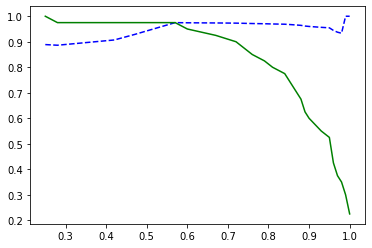

In [38]:
from sklearn.metrics import precision_recall_curve

y_probas = cross_val_predict(forest_clf, moons_prepared, y_train, cv=3,
                             method="predict_proba")

y_scores = y_probas[:, 1]   # score = probability of positive class

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

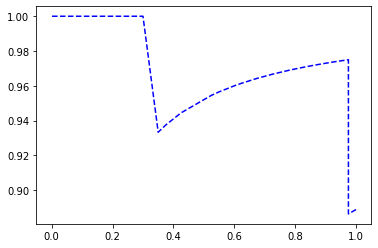

In [39]:
plt.plot(recalls, precisions, "b--",)
plt.show()

You can see that precision stays high (above 95%) and starts to fall sharply around 95% recall. You will probably want to select a precision/recall trade-off just before that drop.

Suppose you decide to aim for 95% precision. You look up the first plot and find the threshold value. This looks like a threshold value of 0.5.

To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can use the threshold with the scores:

In [54]:
y_train_pred_90 = (y_scores >= .5)

print(precision_score(y_train, y_train_pred_90))
print(recall_score(y_train, y_train_pred_90))

0.975
0.975


The default threshold value is .5. So, if the probability score is greater than .5, we're accepting it as True and if it is less than .5, we're accepting it as False. 

Here, even if we changing this threshold value to be something else (e.g value of .9), the precision stays more or less the same, but the recall starts to really drop off. So, we can stick with a threshold value close to the default of 0.5.

Great, you have a 90% precision classifier! As you can see, it is fairly easy to create a classifier with virtually any precision you want: just set the right threshold value and you’re done. But, you'll have to measure the recall score, to see if it is too low as a acceptable for the specific problem. In this particular case, we get high values for both, which is great.

<h3><b> ROC Curve </b></h3>

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.

It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate (FPR). The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to 1 – the true negative rate (TNR), which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity.

Hence, the ROC curve plots sensitivity (recall) versus 1 – specificity.

In [49]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

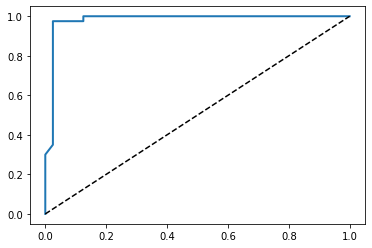

In [52]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid

plot_roc_curve(fpr, tpr)
plt.show()

Once again there is a trade-off: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC:

In [53]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_train, y_scores))

0.980625


<h3><b> ROC vs PR Curve </b></h3>

Since the ROC curve is so similar to the precision/recall (PR) curve, you may wonder how to decide which one to use.

As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives. Otherwise, use the ROC curve.

<h3><b> Try other models and measure scores </b></h3>

Let’s now train a SVC and compare its ROC curve and ROC AUC score to those of the RandomForestClassifier.

In [65]:
from sklearn.svm import SVC

# We know that moons represents a dataset that needs to be classified using a polynomial curve
# So, let's try to fit a polynomial
# if you're using SVR with kernel ="poly", then you don't need to transform X
# using PolynomialFeatures, this will do it under the hood using the degree of the polynomial
# that you specify as input
svm_clf = SVC(kernel='poly', degree=3, C=100)
svm_clf.fit(X, y.ravel())

y_scores_svm = cross_val_predict(svm_clf, moons_prepared, y_train, cv=3,
                                  method="decision_function")

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train, y_scores_svm)

Now you are ready to plot the ROC curve. It is useful to plot the first ROC curve as well to see how they compare.

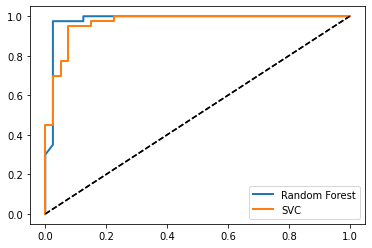

In [66]:
plot_roc_curve(fpr, tpr, "Random Forest")
plot_roc_curve(fpr_svm, tpr_svm, "SVC")
plt.legend(loc="lower right")
plt.show()

In [68]:
print(roc_auc_score(y_train, y_scores_svm))

y_scores_svm = cross_val_predict(svm_clf, moons_prepared, y_train, cv=3)
print(precision_score(y_train, y_scores_svm))
print(recall_score(y_train, y_scores_svm))

0.9675
0.8666666666666667
0.975


Based on the ROC AUC score, precision and recall scores, it looks like the Random Forest classifier is the better.

<h3><b> Try other models and measure scores </b></h3>

Let’s now train a SGDClassifier.

In [75]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)

moons_prepared_poly = poly_features.fit_transform(moons_prepared)

sgd_clf = SGDClassifier()
y_scores_sgd = cross_val_predict(sgd_clf, moons_prepared_poly, y_train, cv=3,
                             method="decision_function")

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train, y_scores_sgd)

Now you are ready to plot the ROC curve. It is useful to plot the first ROC curve as well to see how they compare.

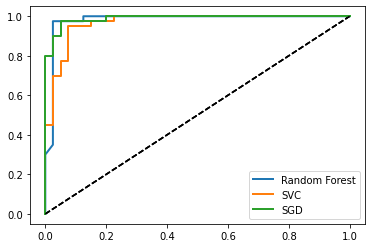

In [77]:
plot_roc_curve(fpr, tpr, "Random Forest")
plot_roc_curve(fpr_svm, tpr_svm, "SVC")
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD")
plt.legend(loc="lower right")
plt.show()

In [82]:
print(roc_auc_score(y_train, y_scores_sgd))

y_scores_sgd = cross_val_predict(sgd_clf, moons_prepared_poly, y_train, cv=3)
print(precision_score(y_train, y_scores_sgd))
print(recall_score(y_train, y_scores_sgd))

0.9125
1.0
0.975


Based on the ROC AUC score, precision and recall scores, it looks like the Random Forest classifier is still the best but others are also good.

<h3><b> Try other models and measure scores </b></h3>

Let’s now train a KNN Classifier.

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
y_probas_knn = cross_val_predict(knn_clf, moons_prepared, y_train, cv=3,
                                  method="predict_proba")

y_scores_knn = y_probas_knn[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, y_scores_knn)

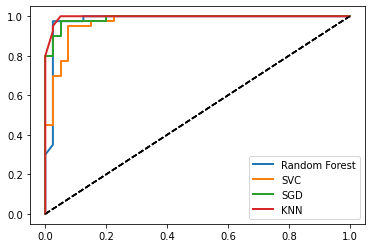

In [80]:
plot_roc_curve(fpr, tpr, "Random Forest")
plot_roc_curve(fpr_svm, tpr_svm, "SVC")
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD")
plot_roc_curve(fpr_knn, tpr_knn, "KNN")
plt.legend(loc="lower right")
plt.show()

In [81]:
print(roc_auc_score(y_train, y_scores_knn))

y_scores_knn = cross_val_predict(knn_clf, moons_prepared, y_train, cv=3)

print(precision_score(y_train, y_scores_knn))
print(recall_score(y_train, y_scores_knn))

0.9959375
0.9743589743589743
0.95


Based on the ROC AUC score, precision and recall scores, it looks like the KNN is best followed by the Random Forest classifier.

In [83]:
from sklearn.linear_model import LogisticRegression

sofmax_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs")
y_probas_log = cross_val_predict(sofmax_clf, moons_prepared, y_train, cv=3,
                                  method="predict_proba")

y_scores_log = y_probas_log[:, 1]


fpr_log, tpr_log, thresholds_log = roc_curve(y_train, y_scores_log)

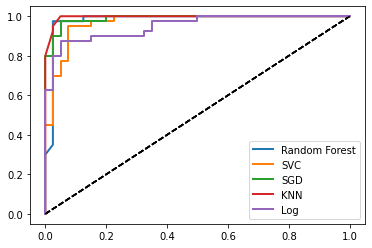

In [84]:
plot_roc_curve(fpr, tpr, "Random Forest")
plot_roc_curve(fpr_svm, tpr_svm, "SVC")
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD")
plot_roc_curve(fpr_knn, tpr_knn, "KNN")
plot_roc_curve(fpr_log, tpr_log, "Log")
plt.legend(loc="lower right")
plt.show()

In [85]:
print(roc_auc_score(y_train, y_scores_log))

y_scores_log = cross_val_predict(sofmax_clf, moons_prepared, y_train, cv=3)

print(precision_score(y_train, y_scores_log))
print(recall_score(y_train, y_scores_log))

0.95
0.875
0.875


After evaluating the models based on their ROC AUC score, precision and recall scores, we have to choose the most promising model. For the purposes of this example, let us assume that the SGD Classifier is the chosen model.

<h2 style="background-color:rgba(100,100,100,0.5);"> Fine-Tune Your Model </h2>

After shortlisting some promising models, you need to fine-tune the models.

Grid Search
One option would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.

Instead, you should get Scikit-Learn’s GridSearchCV to search for you. All you need to do is tell it which hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values.

For example, the following code searches for the best combination of hyperparameter values for the SGD Classifier.

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_iter': [100, 500, 1000],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'l1_ratio': [0.15, 0.25, 0.5, 0.75]
    },
]

grid_search = GridSearchCV(sgd_clf, param_grid, cv=3)
grid_search.fit(moons_prepared_poly, y_train)

print(grid_search.best_params_)

{'l1_ratio': 0.15, 'max_iter': 100, 'penalty': 'l2'}


<h2 style="background-color:rgba(100,100,100,0.5);"> Analyze the Best Models and Their Errors </h2>

You will often gain good insights on the problem by inspecting the best models.

First, look at the confusion matrix. You need to make predictions using the cross_val_predict() function, then call the confusion_matrix() function (for the default threshold value):

In [89]:
sgd_clf = grid_search.best_estimator_

y_train_pred = cross_val_predict(sgd_clf, moons_prepared_poly, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

print(conf_mx)

[[39  1]
 [ 3 37]]


It’s often more convenient to look at an image representation of the confusion matrix, using Matplotlib’s matshow() function:

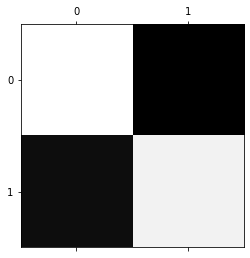

In [90]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

A good confusion matrix will have most images on the main diagonal which means that they were classified correctly. The predictions for True look slightly darker than the False, which could mean that there are fewer survived in the dataset or that the classifier does not perform as well on the True as on the False. In this particular case, we know that are equal instances of both categories in the dataset, so it performs slightly less on this category type.

Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute numbers of errors (which would make abundant classes look unfairly bad), then fill the diagonal with zeros to keep only the errors, and plot the result.

Let’s now train a SGDClassifier.

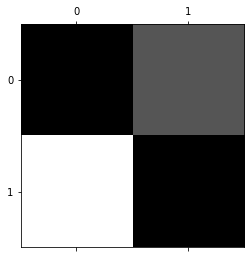

In [92]:
import numpy as np

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

plt.show()

The rows represent actual classes, while columns represent predicted classes. It looks like the classifier has some false positives.

Analyzing the confusion matrix often gives you insights into ways to improve your classifier.

<h2 style="background-color:rgba(100,100,100,0.5);"> Evaluate Your System on the Test Set </h2>

After tweaking your models for a while, you eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set.

There is nothing special about this process; just get the predictors and the labels from your test set, run your full_pipeline to transform the data (call transform(), not fit_transform — you do not want to fit the test set!), and evaluate the final model on the test set.


In [94]:
from sklearn.metrics import classification_report

final_model =  grid_search.best_estimator_

X_test_prepared = poly_features.transform(num_pipeline.transform(X_test))
y_test_pred = final_model.predict(X_test_prepared)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



<h2 style="background-color:rgba(100,100,100,0.5);"> Summary </h2>

This exercise demonstrates how to do build a polynomial classification model for the moons toy data set. This presents an overview of the steps, but does not exhaustively consider all possible different models, nor does it select the best possible hyperparameters but, nevertheless performs reasonably well based on the scores.